<a href="https://colab.research.google.com/github/MinMolang/keras/blob/master/Keras_Classification_%EC%99%84%EC%A0%84%EC%97%B0%EA%B2%B0%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%85%8C%EC%8A%A4%ED%8A%B8(Mnist).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
reference : https://github.com/data-better/DeepS/blob/master/10%EC%9E%A5_MNIST_DL.ipynb
'''

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from tensorflow.keras import datasets, models
import numpy as np
np.random.seed(7)

print('Python version : ', sys.version)
print('TensorFlow version : ', tf.__version__)
print('Keras version : ', keras.__version__)

Python version :  3.6.9 (default, Jul 17 2020, 12:50:27) 
[GCC 8.4.0]
TensorFlow version :  2.3.0
Keras version :  2.4.3


In [3]:
#CHECK GPU
!nvidia-smi

Sun Sep 20 12:40:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

11493376/11490434 [==============================] - 0s 0us/step


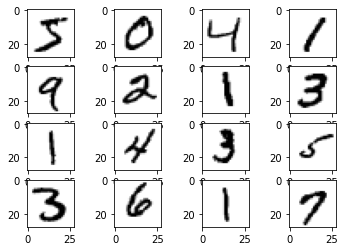

In [4]:

mnist = datasets.mnist

(train_x, train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x / 255.0, test_x / 255.0

import matplotlib.pyplot as plt
for col1 in range(16):
  plt.subplot(4,4,col1+1)
  plt.imshow(train_x[col1].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [5]:

digit =  train_x[0]
print(type(digit))

print("digit :", digit.shape)
print("train images :", train_x.shape)
print("test  images :", test_x.shape)

<class 'numpy.ndarray'>
digit : (28, 28)
train images : (60000, 28, 28)
test  images : (10000, 28, 28)


In [8]:
model = models.Sequential([
  Flatten(input_shape=(28, 28)),
  Dense(1024, activation='relu'),
  Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


3. Model layer **Visualization**

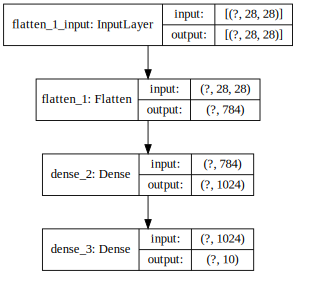

In [9]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline
#svg format image resize option >> dpi = 65
SVG(model_to_dot(model, show_shapes=True ,dpi=65).create(prog='dot', format='svg'))

In [11]:
epochs = 12
batch_size = 256
split_num = 0.25


In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model.fit(train_x, train_y,
                 batch_size=batch_size,
                 epochs=epochs,
                 verbose=1, 
               validation_split=split_num)

Epoch 1/12
176/176 [==============================] - 1s 6ms/step - loss: 0.3263 - accuracy: 0.9075 - val_loss: 0.1743 - val_accuracy: 0.9489
Epoch 2/12
176/176 [==============================] - 1s 5ms/step - loss: 0.1315 - accuracy: 0.9618 - val_loss: 0.1233 - val_accuracy: 0.9639
Epoch 3/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0843 - accuracy: 0.9770 - val_loss: 0.1021 - val_accuracy: 0.9699
Epoch 4/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0600 - accuracy: 0.9829 - val_loss: 0.0934 - val_accuracy: 0.9729
Epoch 5/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0444 - accuracy: 0.9880 - val_loss: 0.0877 - val_accuracy: 0.9732
Epoch 6/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0319 - accuracy: 0.9914 - val_loss: 0.0897 - val_accuracy: 0.9733
Epoch 7/12
176/176 [==============================] - 1s 5ms/step - loss: 0.0230 - accuracy: 0.9946 - val_loss: 0.0800 - val_accuracy: 0.9759
Epoch 

In [20]:
sc = model.evaluate(test_x, test_y)
print("accuracy : ", sc[1], "  loss : ", sc[0])

313/313 [==============================] - 1s 3ms/step - loss: 0.0630 - accuracy: 0.9808
accuracy :  0.9807999730110168   loss :  0.06304489076137543


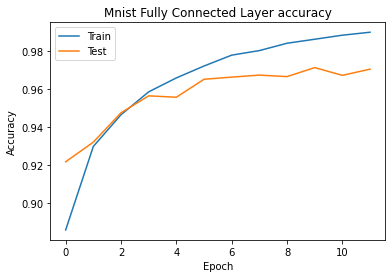

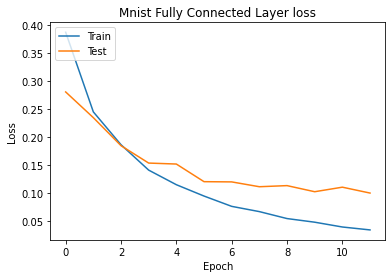

In [19]:
import matplotlib.pyplot as plt


# 학습 정확성 값과 검증 정확성 값을 플롯팅 합니다. 
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Mnist Fully Connected Layer accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')


plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅 합니다.
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Mnist Fully Connected Layer loss')
plt.ylabel('Loss')

plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

5. Evaluate

In [22]:
import matplotlib.pyplot as plt


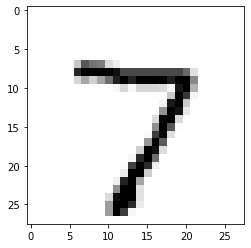

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
The Answer is  [7]


In [23]:
n = 0
plt.imshow(test_x[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(test_x[n].reshape((1, 28, 28, 1))))